# Netflix Dataset Analysis

This report aims to explore and analyze the Netflix dataset, which comprises a comprehensive list of movies and TV shows available on Netflix. The analysis includes data cleaning, preparation, and visualization to uncover insights and trends. 


In this section, we import the necessary libraries for data manipulation and visualization:


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots are displayed inline in the Jupyter Notebook
%matplotlib inline


Here we load the Netflix dataset into a DataFrame using pandas and display the first few rows with the `head()` function to preview the data structure.


In [18]:
# Load the dataset
netflix_data = pd.read_csv('netflix_titles.csv')

# Display the first few rows to understand the structure of the dataset
netflix_data.tail()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


We assess the dataset for any missing values across different columns and display the count of missing entries per column to identify if any data cleaning is needed.


In [19]:
# Calculate the number of missing values in each column
missing_values = netflix_data.isnull().sum()

# Display the missing values count for each column
missing_values


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Missing entries in the 'director', 'cast', and 'country' columns are filled with 'Unknown' to maintain data integrity.



In [20]:
# Fill missing values for 'director', 'cast', and 'country' with 'Unknown'
netflix_data['director'].fillna('Unknown', inplace=True)
netflix_data['cast'].fillna('Unknown', inplace=True)
netflix_data['country'].fillna('Unknown', inplace=True)

Rows with missing 'date_added', 'rating', or 'duration' information are removed to ensure the quality of our analysis.


In [21]:
# Drop rows with missing values in 'date_added', 'rating', and 'duration'
netflix_data.dropna(subset=['date_added', 'rating', 'duration'], inplace=True)

We recheck for missing values to confirm that our data cleaning steps were successful.


In [22]:
# Confirm changes by checking for missing values again
missing_values_after = netflix_data.isnull().sum()
missing_values_after

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

The 'date_added' column is converted to datetime format for easier analysis of time-based data.
We check the data types to confirm the successful conversion of 'date_added' to datetime format.


In [23]:
# Convert 'date_added' to datetime format
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])

# Confirm the conversion
netflix_data.dtypes


show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [24]:
# Display a statistical summary of the numerical columns
netflix_data.describe()


,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


### Netflix Content Trend Analysis

This snippet analyzes Netflix's content growth over the years. It extracts years from the 'date_added' column, counts titles added annually, and visualizes the trend using a line plot.


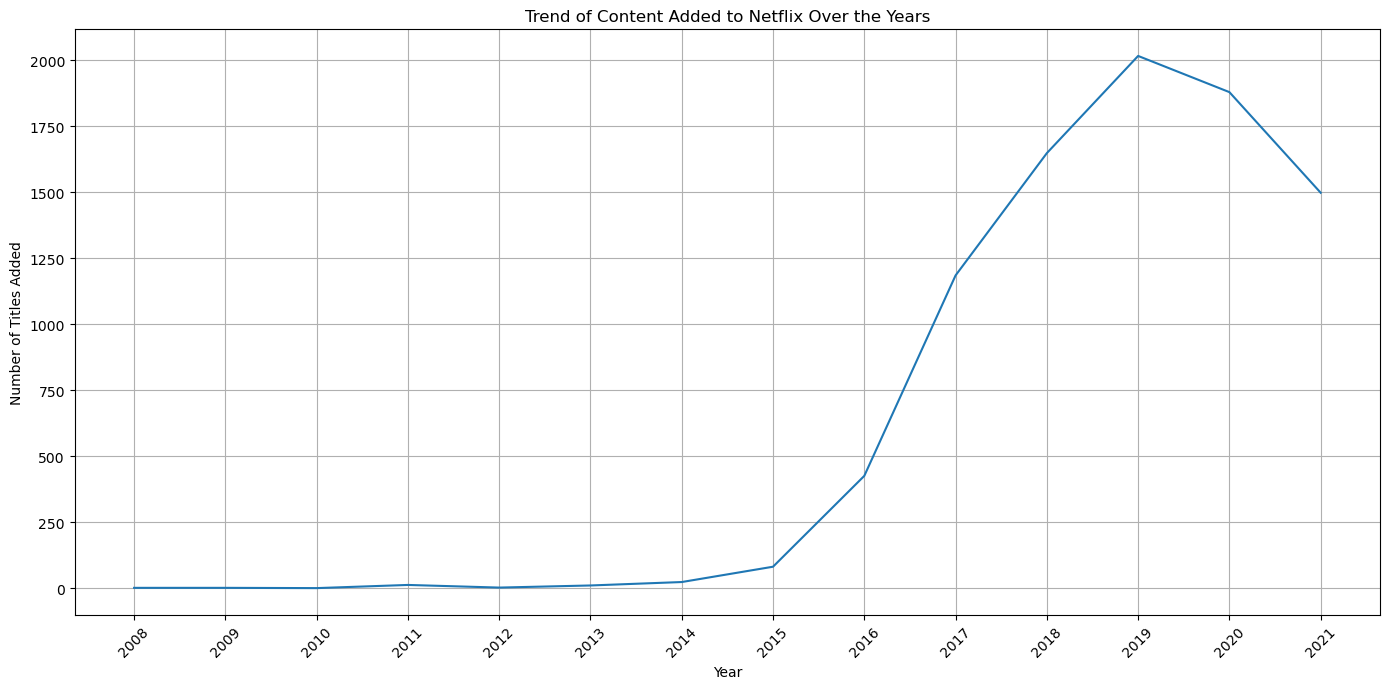

In [25]:
# Extract year from 'date_added' and create a new column 'year_added'
netflix_data['year_added'] = netflix_data['date_added'].dt.year

# Count the number of titles added each year
titles_per_year = netflix_data.groupby('year_added').size()

# Create a line plot for the number of titles added each year
plt.figure(figsize=(14, 7))
sns.lineplot(x=titles_per_year.index, y=titles_per_year.values)
plt.title('Trend of Content Added to Netflix Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.xticks(titles_per_year.index, rotation=45)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of ylabel
plt.show()

To crossverify number of content addded in particular by graph and code

In [26]:
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'], errors='coerce')

# Extract the year from the 'date_added' column
netflix_data['year_added'] = netflix_data['date_added'].dt.year

# Filter the DataFrame for films added in 2018 and count them
films_added_2011 = netflix_data[(netflix_data['type'] == 'Movie') & (netflix_data['year_added'] == 2011)].shape[0]

print(f"Number of films added in 2018: {films_added_2011}")


Number of films added in 2018: 13


### Netflix Monthly Content Analysis

This code snippet analyzes the monthly distribution of content added to Netflix. It extracts month names from the 'date_added' column, counts titles added per month, sorts the data, and visualizes it with a bar plot.


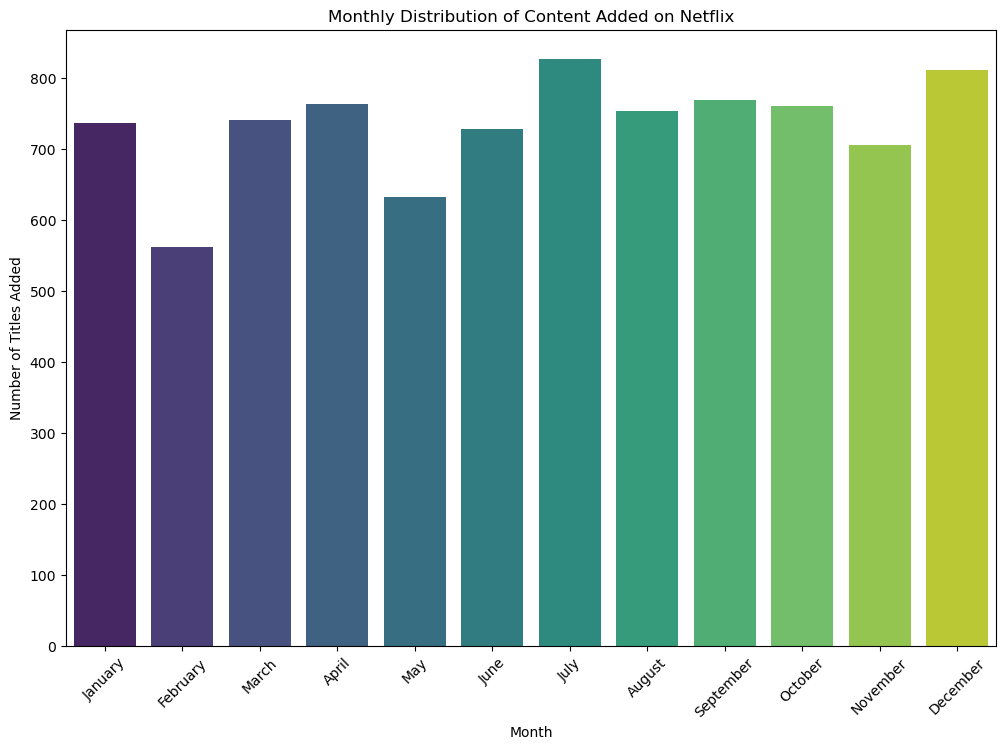

In [27]:
# Assuming the 'date_added' column of netflix_df is already in datetime format
netflix_data['month_added'] = netflix_data['date_added'].dt.month_name(locale='English')

# Count the number of titles added each month
monthly_content_count = netflix_data['month_added'].value_counts()

# Sort the months in calendar order
months_in_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
monthly_content_count = monthly_content_count.reindex(months_in_order)

# Plotting the number of titles added by month
plt.figure(figsize=(12, 8))
sns.barplot(x=monthly_content_count.index, y=monthly_content_count.values, palette='viridis')
plt.title('Monthly Distribution of Content Added on Netflix')
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=45)  # Rotate the month labels for better readability
plt.show()


We count and visualize the distribution of content types (Movies and TV Shows) on Netflix using a bar chart, highlighting the differences in their quantities.


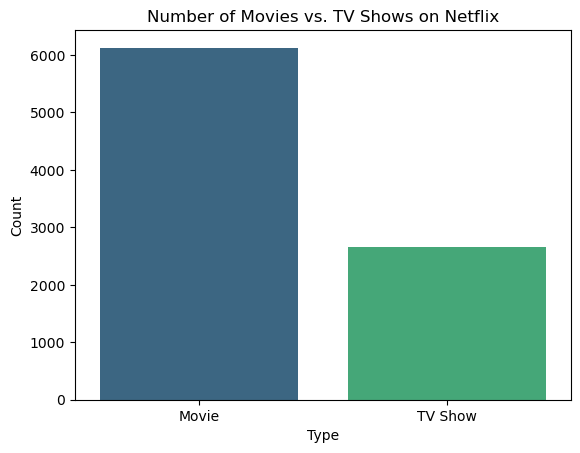

In [31]:
# Count the number of movies and TV shows
type_counts = netflix_data['type'].value_counts()

# Now plot the bar chart
sns.barplot(x=type_counts.index, y=type_counts.values, palette="viridis")
plt.title('Number of Movies vs. TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


## Summary Statistics

To better understand the distribution of content on Netflix, we review summary statistics for key variables in the dataset. This will include measures such as the mean, median, and standard deviation for the numerical columns and the frequency of categories for the nominal data.


In [32]:
# Summary statistics for numerical columns
summary_stats_numeric = netflix_data.describe()
summary_stats_numeric



,release_year,year_added
count,8790.000000,8790.000000
mean,2014.183163,2018.873606
std,8.825466,1.573568
min,1925.000000,2008.000000
25%,2013.000000,2018.000000
50%,2017.000000,2019.000000
75%,2019.000000,2020.000000
max,2021.000000,2021.000000


### Correlation Analysis: Release Year vs Year Added

This code snippet calculates and visualizes the correlation between the release year of content and the year it was added to Netflix.


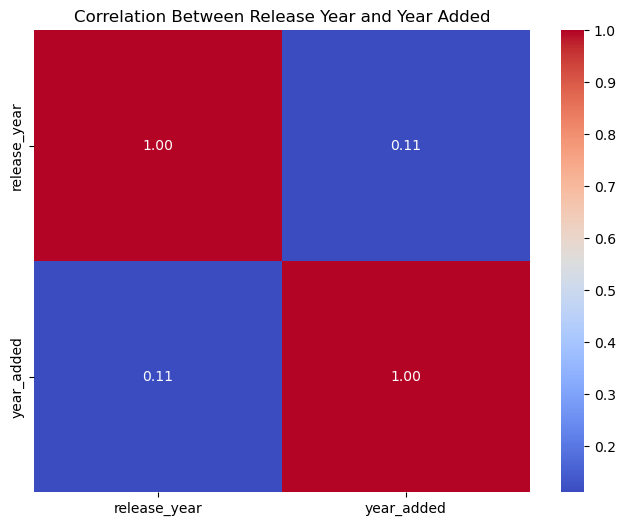

In [33]:
# Select numeric columns for correlation
numeric_cols = netflix_data[['release_year', 'year_added']]

# Calculate correlations
corr = numeric_cols.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Release Year and Year Added')
plt.show()
